In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('E:\\myproj\\Wine.csv')

In [6]:
data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesuim,Total_phenols,Flavonoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesuim,Total_phenols,Flavonoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesuim                       178 non-null int64
Total_phenols                   178 non-null float64
Flavonoid                       178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280-OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [9]:
y = data['Class']

In [10]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [11]:
y_cat = pd.get_dummies(y)

In [12]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [13]:
X = data.drop('Class',axis=1)

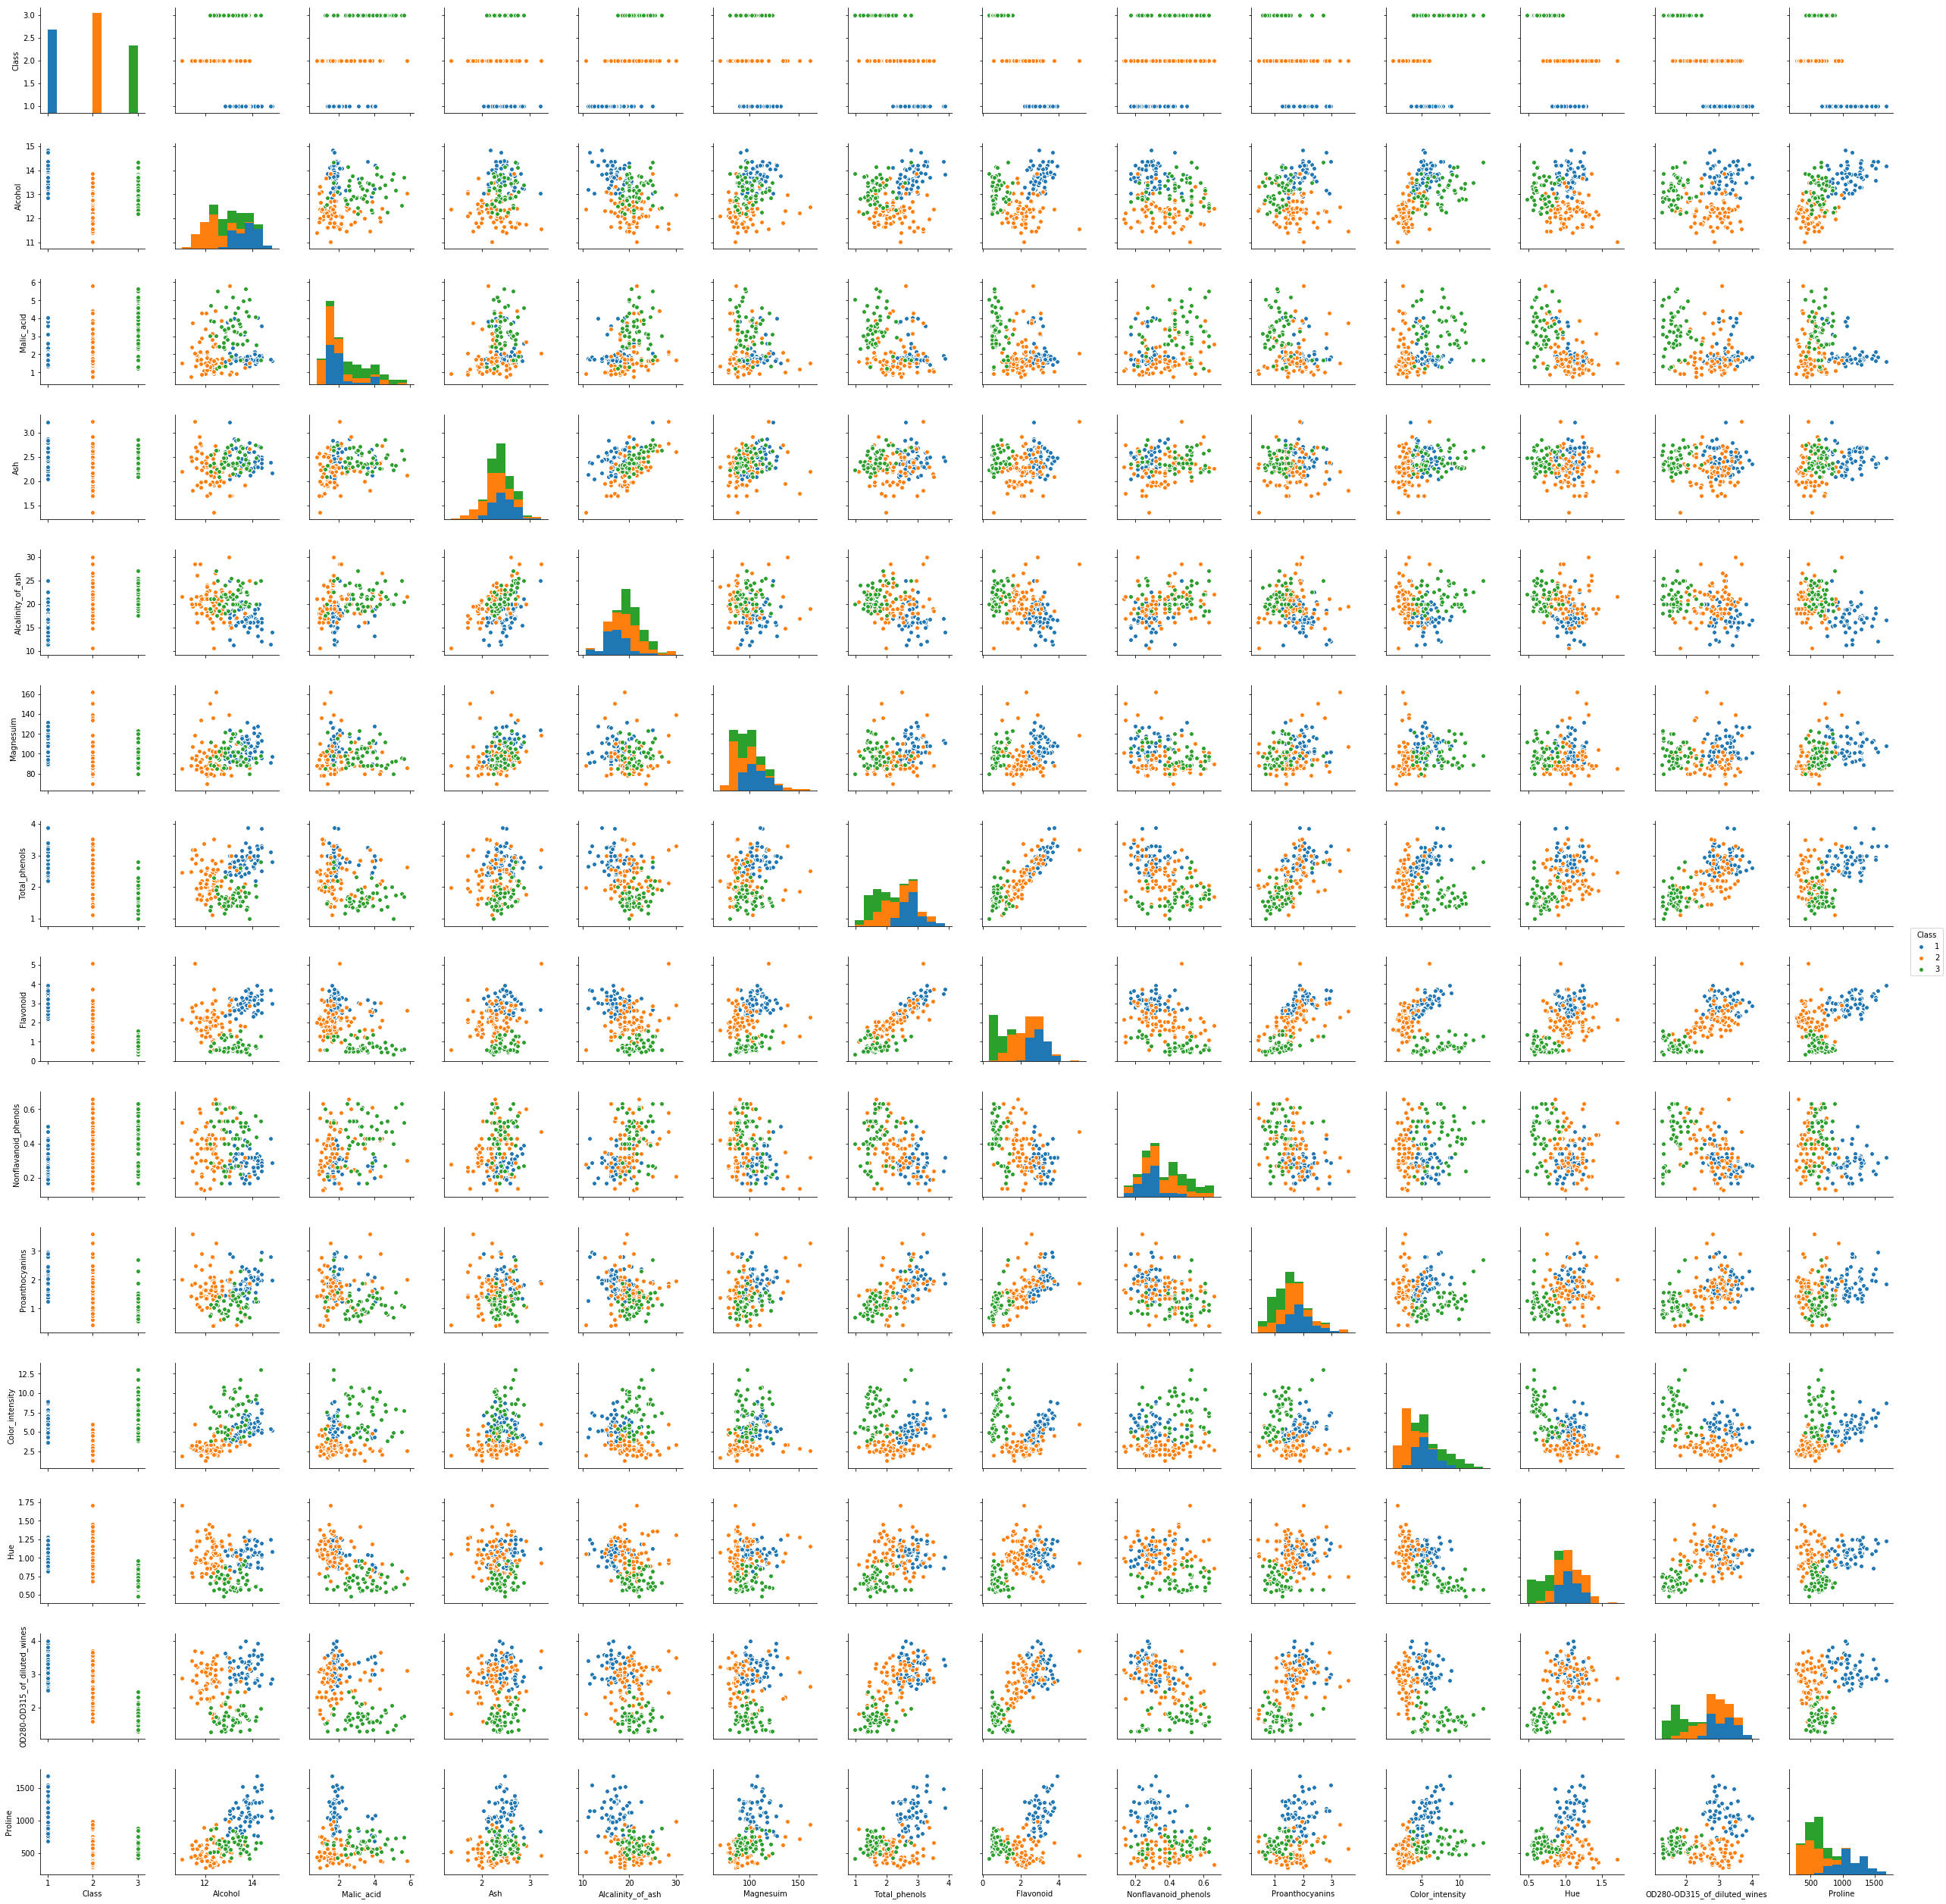

In [16]:
sns.pairplot(data,hue='Class')

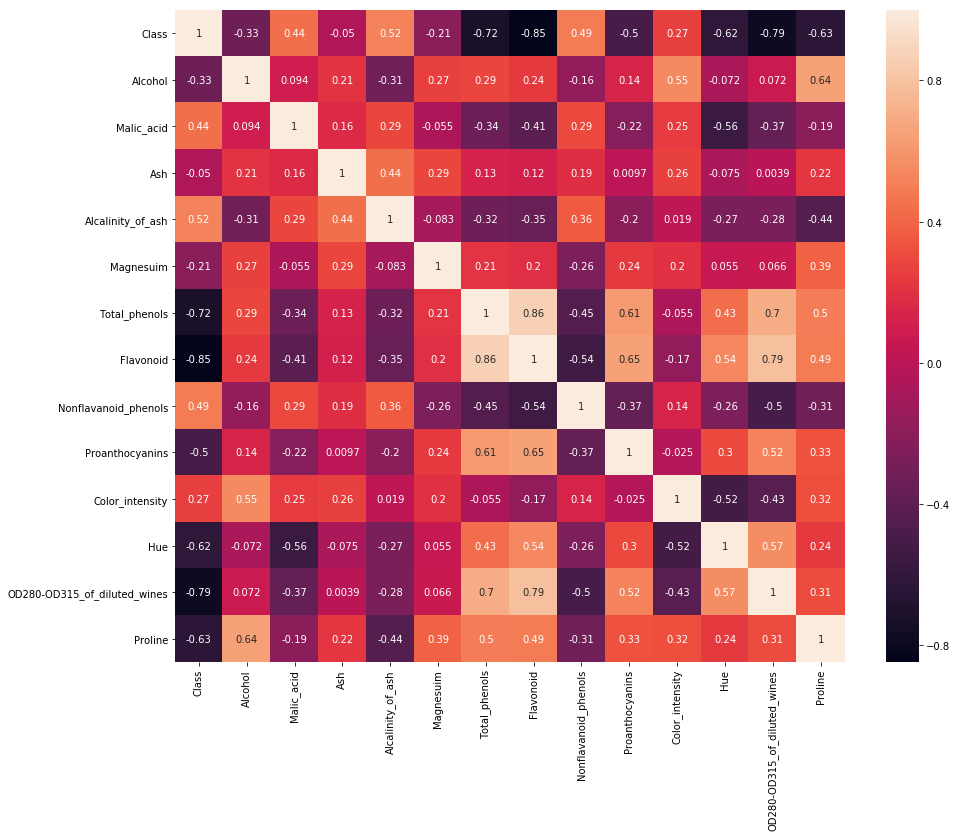

In [20]:
plt.subplots(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

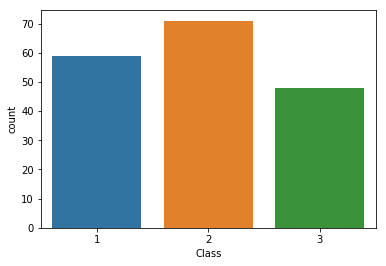

In [21]:
sns.countplot(data["Class"])

In [22]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
XS = sc.fit_transform(X) 

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adadelta, RMSprop
import keras.backend as K

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [56]:
K.clear_session()
model = Sequential()
model.add(Dense(8,input_shape=(13,),kernel_initializer='he_normal',activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(Adam(lr=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [58]:
model.fit(XS, y_cat.values,batch_size=10,epochs=5,validation_split=0.1,verbose=2)

Train on 160 samples, validate on 18 samples
Epoch 1/5
 - 0s - loss: 0.3402 - acc: 0.9875 - val_loss: 0.0366 - val_acc: 1.0000
Epoch 2/5
 - 0s - loss: 0.2623 - acc: 0.9812 - val_loss: 0.0144 - val_acc: 1.0000
Epoch 3/5
 - 0s - loss: 0.1994 - acc: 0.9875 - val_loss: 0.0261 - val_acc: 1.0000
Epoch 4/5
 - 0s - loss: 0.1618 - acc: 0.9875 - val_loss: 0.0183 - val_acc: 1.0000
Epoch 5/5
 - 0s - loss: 0.1334 - acc: 1.0000 - val_loss: 0.0116 - val_acc: 1.0000


In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


# Thank you